In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.formatter.useoffset'] = False

#%load_ext rpy2.ipython



In [2]:
def formatAxes(ax,text_size=10,xlim=None,xlabel=None,xticks=None,xticklabels=None,ylim=None,yticks=None,ylabel=None,yticklabels=None):
    """ to tweak the plotting of the axes as well as the fontsize """
    for loc,spine in list(ax.spines.items()):
        if loc == 'left': # settings for the y-axis
            if yticklabels and not yticks:
                sys.stderr.write("Need to provide a list wiht both y-labels and y-ticks!")
            if yticks:
                ax.yaxis.set_ticks_position('left')
                ax.yaxis.set_tick_params(direction='out')
                spine.set_visible(True)
                spine.set_position(("outward",1))
                spine.set_smart_bounds(True)
                ax.set_yticks(yticks)
                if ylim:
                    ax.set_ylim(ylim)
                if yticklabels:
                    ax.set_yticklabels(yticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_yticklabels([])
                ax.tick_params(axis='y',which='both',length=0)
                
            if ylabel:
                ax.set_ylabel(ylabel,fontsize=text_size,rotation=0,labelpad=160)
                ax.get_yaxis().set_label_coords(-0.1,0.5)
        elif loc == 'bottom': # settings for x-axis
            if xticks:
                spine.set_position('zero')
                spine.set_visible(False)
                spine.set_smart_bounds(False)
                ax.set_xticks(xticks)
                ax.tick_params(axis='x',which='both',length=0)
                if xlim:
                    ax.set_xlim(xlim)
                if xticklabels:
                    ax.set_xticklabels(xticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_xticklabels([])
                ax.tick_params(axis='x',which='both',length=0)
                
            if xlabel:
                ax.tick_params(axis='x',which='both',length=0)
                ax.set_xlabel(xlabel,fontsize=text_size+2)
                ax.xaxis.labelpad = 10
        else:
            spine.set_visible(False)
    ax.patch.set_visible(False)

In [3]:
## Loading the big dataframe
alldata = pd.read_csv('../../../big_dataframe_Xist_diffBUM_HMM_scaled_dc.txt',sep="\t",header=0,index_col=0)


In [4]:
alldata.head()

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR
0,1,C,0,0,0.0,0,0,0,0,0,0,1.693237e-14,1.790644e-20,0
1,2,G,0,0,0.0,0,0,0,0,0,0,6.789051e-03,6.823904e-03,0
2,3,G,0,0,0.0,0,0,0,0,0,0,9.031615e-03,9.110841e-03,0
3,4,C,0,0,0.0,0,0,0,0,0,0,6.793530e-03,6.927069e-03,0
4,5,T,0,0,0.0,0,0,0,0,0,0,1.128597e-08,5.186918e-06,0


### Count number of DRNs in diffBUM_HMM data:

In [5]:
threshold = 0.95

counter = 0
counter2 = 0
for index, row in alldata.iterrows():
    if row['diffBUMHMM_ex_vivo'] > threshold:
        counter = counter+1    
    elif row['diffBUMHMM_in_cell'] > threshold:
        counter2= counter2 +1
    else:
        continue
        
print("ex_vivo\t",counter)
print("in_vivo\t",counter2)

num_diff_nucl_ex_vivo=counter
num_diff_nucl_in_cell=counter2

ex_vivo	 1739
in_vivo	 188


### How many binding sites for each protein were found that overlapped with modified nucleotides in the ex vivo data?

In [6]:
morereactive_ex_vivo = alldata[alldata.diffBUMHMM_ex_vivo > threshold]
morereactive_in_cell = alldata[alldata.diffBUMHMM_in_cell > threshold]
proteins = alldata.columns[5:11]

In [7]:
dict_total_binding_sites_differential_exvivo={}
dict_total_binding_sites_differential_incell={}

for protein in proteins:
    #print("%s\ttotal_count:\t%s" % (protein,morereactive_ex_vivo[protein].sum()))
    dict_total_binding_sites_differential_exvivo[protein]=morereactive_ex_vivo[protein].sum()

    
for protein in proteins:
    #print("%s\ttotal_count:\t%s" % (protein,morereactive_ex_vivo[protein].sum()))
    dict_total_binding_sites_differential_incell[protein]=morereactive_in_cell[protein].sum()
    
print(dict_total_binding_sites_differential_exvivo)
print(dict_total_binding_sites_differential_incell)

{'CELF1': 60, 'FUS': 375, 'HuR': 96, 'PTBP1': 53, 'RBFOX2': 2, 'TARDBP': 58}
{'CELF1': 11, 'FUS': 33, 'HuR': 17, 'PTBP1': 10, 'RBFOX2': 2, 'TARDBP': 2}


In [8]:
##IN CELL

In [9]:
morereactive_in_cell = alldata[alldata.diffBUMHMM_in_cell > threshold]
proteins = alldata.columns[5:11]

In [10]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_in_cell[protein].sum()))

CELF1	total_count:	11
FUS	total_count:	33
HuR	total_count:	17
PTBP1	total_count:	10
RBFOX2	total_count:	2
TARDBP	total_count:	2


### Same but in delta_SHAPE

In [11]:
alldata[alldata.DeltaSHAPE_ex_vivo > 0].head()

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR
209,210,T,1,0,1.365817,0,0,0,0,0,0,3.341549e-04,4.392628e-01,1
210,211,T,1,0,1.504202,0,0,0,0,0,0,6.123091e-24,1.242867e-52,1
211,212,T,1,0,1.721811,0,0,0,0,0,0,1.802013e-04,2.930757e-01,1
243,244,A,1,0,1.628085,0,0,1,0,0,0,2.619692e-12,3.105350e-56,1
244,245,T,1,0,2.116178,0,0,1,0,0,0,1.021677e-03,2.388718e-01,1


In [12]:
counter = 0
counter2 = 0
for index, row in alldata.iterrows():
    if row['DeltaSHAPE_ex_vivo'] > 0.0:
        counter = counter+1    
    elif row['DeltaSHAPE_in_cell'] > 0.0:
        counter2= counter2 +1
    else:
        continue
        
print("dSHAPE ex vivo %s" % counter)
print("dSHAPE in vivo %s" % counter2)

dSHAPE ex vivo 866
dSHAPE in vivo 683


In [13]:
morereactive_ex_vivo = alldata[alldata.DeltaSHAPE_ex_vivo > 0]

In [14]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_ex_vivo[protein].sum()))

CELF1	total_count:	104
FUS	total_count:	162
HuR	total_count:	171
PTBP1	total_count:	95
RBFOX2	total_count:	3
TARDBP	total_count:	8


In [15]:
##IN CELL

In [16]:
morereactive_in_cell_deltashape = alldata[alldata.DeltaSHAPE_in_cell > 0]

In [17]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_in_cell_deltashape[protein].sum()))

CELF1	total_count:	24
FUS	total_count:	192
HuR	total_count:	34
PTBP1	total_count:	21
RBFOX2	total_count:	0
TARDBP	total_count:	16


In [18]:
print(alldata.columns)

Index(['nucleotide_number', 'nucleotide_identity', 'DeltaSHAPE_ex_vivo',
       'DeltaSHAPE_in_cell', 'average_deltaSHAPE', 'CELF1', 'FUS', 'HuR',
       'PTBP1', 'RBFOX2', 'TARDBP', 'diffBUMHMM_in_cell', 'diffBUMHMM_ex_vivo',
       'dStruct_DDR'],
      dtype='object')


(17918,)
[60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60
 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60
 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60
 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60
 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59
 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60
 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60
 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60 59
 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60
 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60
 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59
 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60
 60 59 60 60 59 60 60 60 59 60 60 60]
[ 0  0  0  3  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 

C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


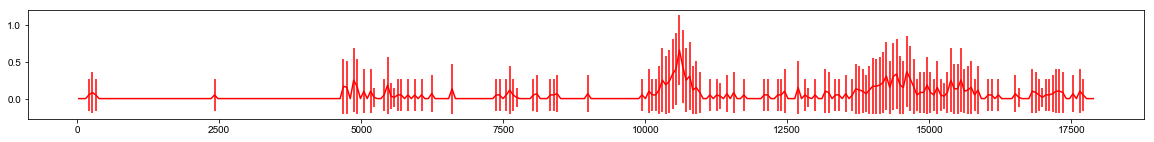

In [19]:
#FOR DELTASHAPE

npa= alldata.as_matrix(columns=alldata.columns[2:3])
y= np.squeeze(npa)


npa2= alldata.as_matrix(columns=alldata.columns[0:1])
x= np.squeeze(npa2)
print(x.shape)

nbins = 300

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

#plt.plot(x, y, 'bo')
#plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

print(n)
print(sy)
print(mean)



C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\maran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


[0. 0. 0. ... 0. 0. 0.]
(17918,)
[60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60
 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60
 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60
 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60
 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59
 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60
 59 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60
 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60 59
 60 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60
 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60
 60 60 59 60 60 59 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59
 60 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60 59 60 60 60 59 60 60
 60 59 60 60 59 60 60 60 59 60 60 60]
[ 0.          5.93905085  4.92981938  4.95858252  0.9

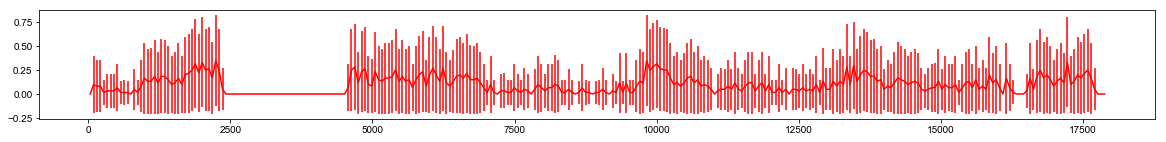

In [20]:
#FOR DIFFBUMHMM ex vivo

npa= alldata.as_matrix(columns=alldata.columns[12:13])
y= np.squeeze(npa)
y[y < 0.95] = 0 
print(y)

npa2= alldata.as_matrix(columns=alldata.columns[0:1])
x= np.squeeze(npa2)
print(x.shape)

nbins = 300

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

#plt.plot(x, y, 'bo')
#plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

print(n)
print(sy)
print(mean)





In [21]:
alldata.columns[12:13]

Index(['diffBUMHMM_ex_vivo'], dtype='object')

In [22]:
alldata

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR
0,1,C,0,0,0.0,0,0,0,0,0,0,1.693237e-14,1.790644e-20,0
1,2,G,0,0,0.0,0,0,0,0,0,0,6.789051e-03,6.823904e-03,0
2,3,G,0,0,0.0,0,0,0,0,0,0,9.031615e-03,9.110841e-03,0
3,4,C,0,0,0.0,0,0,0,0,0,0,6.793530e-03,6.927069e-03,0
4,5,T,0,0,0.0,0,0,0,0,0,0,1.128597e-08,5.186918e-06,0
5,6,T,0,0,0.0,0,0,0,0,0,0,1.191380e-04,1.037761e-11,0
6,7,G,0,0,0.0,0,0,0,0,0,0,2.249087e-13,1.555269e-04,0
7,8,C,0,0,0.0,0,0,0,0,0,0,5.313845e-26,9.078989e-28,0
8,9,T,0,0,0.0,0,0,0,0,0,0,9.080458e-23,1.662307e-16,0
9,10,C,0,0,0.0,0,0,0,0,0,0,5.215553e-19,9.387933e-31,0


In [23]:
#SETTING NUCLEOTIDES TO ZERO IF FALLING IN REGIONS NOT USED BY DIFFBUM HMM
'''
proteins = alldata.columns[5:11]

for index, row in alldata.iterrows():
    if row.values[0]>=1 and row.values[0]<=78 or row.values[0]>=2451 and row.values[0]<=2599 or row.values[0]>=2500 and row.values[0]<=4500 or row.values[0]>=17801 and row.values[0]<=17918:
        for protein in proteins:
            row[protein]=0

''' 
       
#COUNTING UP TOTAL NUMBER OF PROTEIN BINDING SITES, EXCLUDING REGIONS NOT USED BY DIFFBUMHM

dict_total_binding_sites={}
for protein in proteins:
    dict_total_binding_sites[protein]=alldata[protein].sum()
    
print(dict_total_binding_sites)




{'CELF1': 781, 'FUS': 3587, 'HuR': 1137, 'PTBP1': 582, 'RBFOX2': 63, 'TARDBP': 517}


In [24]:
print(dict_total_binding_sites['CELF1'])

781


In [25]:
#INDIVIDUAL SITES

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.stats import hypergeom

'''
Written by Sander
“M" would be total number of Xist nucleotides.
“n” would in your case be total number of nucleotides that are part of an RNA-binding site (i.e. FUS, etc).
“x” would be the total number of differentially modified nucleotides in ex vivo that overlap with the RNA-binding site.
“N” would be the total number of differentially modified nucleotides in ex vivo.
'''
pvalues={}

#Length Xist
M = 17918
for protein in proteins:
    n = int(dict_total_binding_sites[protein])
    
    #EXVIVO
    N = num_diff_nucl_ex_vivo
    x= dict_total_binding_sites_differential_exvivo[protein]
    hpd = hypergeom(M, n, N)
    p_value = hpd.pmf(x)
    key=protein+str('_ex_vivo')
    pvalues[key]=p_value
    
    
    del N
    del x
    del hpd
    del p_value
    
    #INCELL
    N = num_diff_nucl_in_cell
    x= dict_total_binding_sites_differential_incell[protein]
    hpd = hypergeom(M, n, N)
    p_value = hpd.pmf(x)
    key=protein+str('_in_cell')
    pvalues[key]=p_value
    

#M = 17918
#n = int(dict_total_binding_sites['CELF1'])
#x = int(dict_total_binding_sites_differential['CELF1'])
#N = num_diff_nucl_ex_vivo

#print(x,M,n,N)
#hpd = hypergeom(M, n, N)
#p_value = hpd.pmf(x)
#print(p_value)

print(pvalues)

{'CELF1_ex_vivo': 0.007136857924641421, 'CELF1_in_cell': 0.0781645026750893, 'FUS_ex_vivo': 0.005980951880901423, 'FUS_in_cell': 0.05281117467577669, 'HuR_ex_vivo': 0.013912831880618788, 'HuR_in_cell': 0.036063907481634946, 'PTBP1_ex_vivo': 0.05142356182930059, 'PTBP1_in_cell': 0.04340696717997597, 'RBFOX2_ex_vivo': 0.03614687497784715, 'RBFOX2_in_cell': 0.11303398493630808, 'TARDBP_ex_vivo': 0.02898693849243934, 'TARDBP_in_cell': 0.06253036206984103}


In [28]:
#ALL SITES

totals_binding_sites=0
totals_binding_sites_differential_exvivo=0
totals_binding_sites_differential_incell=0

for protein in proteins:
    
    n = int(dict_total_binding_sites[protein])
    totals_binding_sites=totals_binding_sites + n
    
    x = dict_total_binding_sites_differential_exvivo[protein]
    totals_binding_sites_differential_exvivo= totals_binding_sites_differential_exvivo + x
    
    del x
    
    x = dict_total_binding_sites_differential_incell[protein]
    totals_binding_sites_differential_incell = totals_binding_sites_differential_incell + x
    


M = 17918
#EXVIVO
N = num_diff_nucl_ex_vivo
n= totals_binding_sites
x =totals_binding_sites_differential_exvivo

hpd = hypergeom(M, n, N)
p_value = hpd.pmf(x)
print('ex_vivo ' +str(p_value))

del N
del n
del x
del hpd
del p_value

#INCELL
N = num_diff_nucl_in_cell
n= totals_binding_sites
x=totals_binding_sites_differential_incell 

hpd = hypergeom(M, n, N)
p_value = hpd.pmf(x)
print('in_cell ' +str(p_value))

ex_vivo 0.020579798541598422
in_cell 0.04461663691643808
